In [1]:
       #############    ###########   Preparing Data fror A Machine learning Algorithm   ############     ###############

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly as pl
import cufflinks as cf
import seaborn as sns

import sweetviz as sz
from pandas_profiling import ProfileReport
# profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)


In [5]:
# loading dataset
df = pd.read_csv("files/data.csv")
df

,Developer,Age,Salary,Marriage
0,Karachi,42.0,78000.0,No
1,Lahore,32.0,48000.0,Yes
2,Karachi,36.0,60000.0,No
3,Multan,41.0,68000.0,No
4,Lahore,42.0,NaN,Yes
5,Multan,43.0,59000.0,Yes
6,Karachi,NaN,59000.0,No
7,Lahore,44.0,79000.0,Yes
8,Multan,52.0,99000.0,No
9,Lahore,32.0,69000.0,Yes


In [ ]:
#  For standarisation & Normalisation of a dataset for feature scaling, we uses sklearn library

 watch ->  Krish nayak (Statndarisation and normalisation)

In [36]:
          ###############    ############  Finding Outliers in a given dataset   ############    ################

 =>  There are 4 different ways to get outliers from dataset.

           * Using z-formulae     * Using IQR     * Using Scatterplot     * Using Boxplot
    
 =>  Z-formulae is used to standarise a dataset and then all values beyond 3rd Standard deviations are outliers of dataset.

 =>  Using IQR, we find Upper and Lower bounds, then all values beyond this range are known as Outliers.

In [75]:
df = pd.read_csv('files/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
#  Python Program to create a outlier detection function

outliers = []

# defining a function to detect outliers
def detect_outliers(data):
    
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean) / std
        
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

# Driver code
all_outliers = detect_outliers(df['Fare'])
all_outliers

[263.0,
 263.0,
 247.5208,
 512.3292,
 247.5208,
 262.375,
 263.0,
 211.5,
 227.525,
 263.0,
 221.7792,
 227.525,
 512.3292,
 211.3375,
 227.525,
 227.525,
 211.3375,
 512.3292,
 262.375,
 211.3375]

In [101]:
#  Python program to get outliers of a dataset

# Sorting a dataset into Inceasing order
sorted(df['Fare'])

# Getting Quartiles of a Dataset
Q1, Q3 = np.percentile(df['Fare'], [25, 75])
print (Q1, Q3, sep = "\n")

# Calculating IQR
IQR = (Q3 - Q1)
print('IQR is : ', IQR)

# Calculating Upper and Lower bound values of dataset
lower_val = Q1 - (1.5 * IQR)
upper_val = Q3 + (1.5 * IQR)

print ('lower value = ', lower_val)
print ('upper value = ', upper_val)

# Getting all outliers from a dataset
outliers_list = []

def get_outliers(data):
    
    for i in data:
        if i < lower_val or i > upper_val:
            outliers_list.append(i)
            
    return outliers_list
            
    
# driver code
my_outliers = get_outliers(df['Fare'])

for i in my_outliers:
    print(i, end = ',  ')

7.9104
31.0
IQR is :  23.0896
lower value =  -26.724
upper value =  65.6344
71.2833,  263.0,  146.5208,  82.1708,  76.7292,  80.0,  83.475,  73.5,  263.0,  77.2875,  247.5208,  73.5,  77.2875,  79.2,  66.6,  69.55,  69.55,  146.5208,  69.55,  113.275,  76.2917,  90.0,  83.475,  90.0,  79.2,  86.5,  512.3292,  79.65,  153.4625,  135.6333,  77.9583,  78.85,  91.0792,  151.55,  247.5208,  151.55,  110.8833,  108.9,  83.1583,  262.375,  164.8667,  134.5,  69.55,  135.6333,  153.4625,  133.65,  66.6,  134.5,  263.0,  75.25,  69.3,  135.6333,  82.1708,  211.5,  227.525,  73.5,  120.0,  113.275,  90.0,  120.0,  263.0,  81.8583,  89.1042,  91.0792,  90.0,  78.2667,  151.55,  86.5,  108.9,  93.5,  221.7792,  106.425,  71.0,  106.425,  110.8833,  227.525,  79.65,  110.8833,  79.65,  79.2,  78.2667,  153.4625,  77.9583,  69.3,  76.7292,  73.5,  113.275,  133.65,  73.5,  512.3292,  76.7292,  211.3375,  110.8833,  227.525,  151.55,  227.525,  211.3375,  512.3292,  78.85,  262.375,  71.0,  86.5,  12

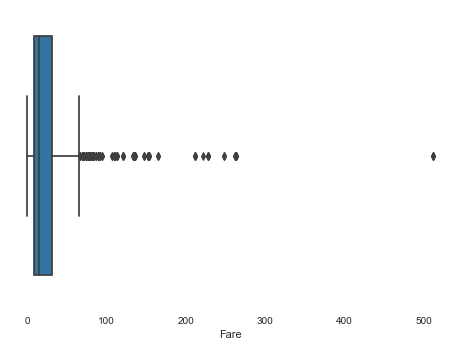

In [103]:
# plotting outliers using Boxplot

sns.boxplot(x = df['Fare'])
plt.show()

In [114]:
# Removing Outliers from a dataset

bool = x.between(lower_val, upper_val)



KeyError: 'True'

In [111]:
df2 = get_outliers(df1)
df2

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6